In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score
import seaborn as sns

In [280]:
#Loading data
df = pd.read_csv('heart_data.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [281]:
#check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [282]:
#checking null values 
df.isnull().sum().sort_values(ascending=False)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
prevalentHyp         0
prevalentStroke      0
age                  0
currentSmoker        0
diaBP                0
sysBP                0
diabetes             0
TenYearCHD           0
dtype: int64

In [283]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [284]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


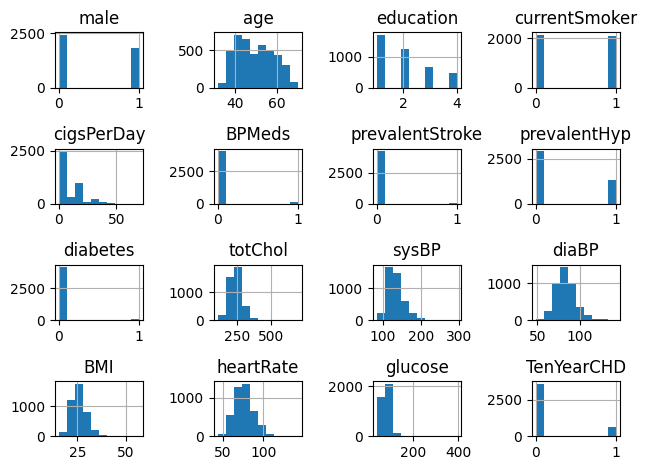

In [285]:
df.hist()
plt.tight_layout()

In [286]:
df.TenYearCHD.value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [287]:

target_df =pd.DataFrame({'TenYearCHD':['no_CHD', 'yes_CHD'], 'chd_count': [3594, 644]})

Text(0.5, 1.0, 'Percentage count of Target category')

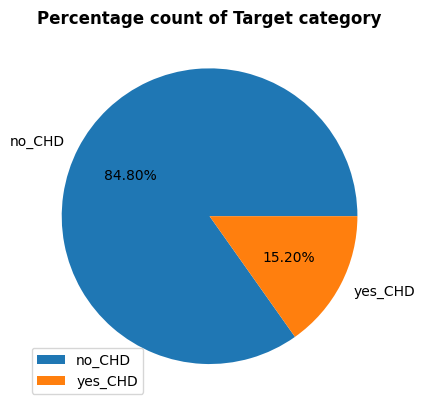

In [107]:
plt.pie(target_df['chd_count'], autopct='%.2f%%', labels=target_df.TenYearCHD)
plt.legend(loc=3)
plt.title('Percentage count of Target category',fontweight='bold')


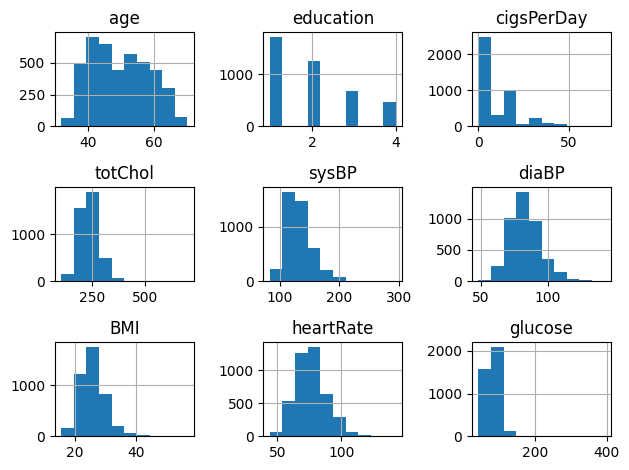

In [288]:
#checking data distributiom of features
df1=df[['age','education','cigsPerDay', 'totChol','sysBP', 'diaBP','BMI', 'heartRate','glucose']]
df1.hist()
plt.tight_layout()

In [289]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<Axes: >

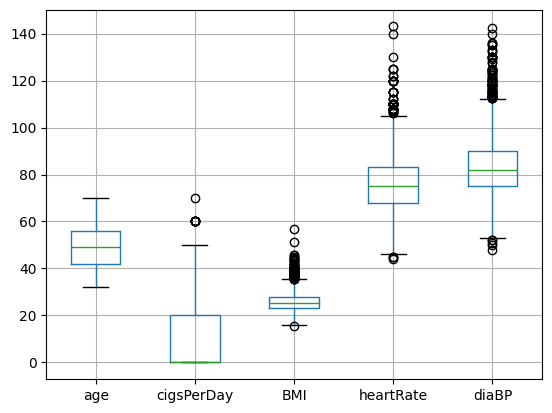

In [290]:
#checking outliers
df[['age','cigsPerDay', 'BMI', 'heartRate','diaBP']].boxplot()

<Axes: >

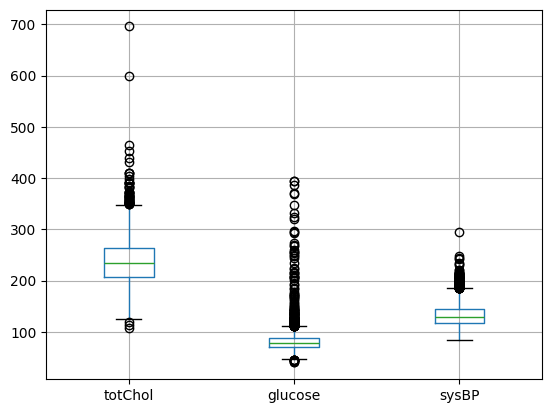

In [291]:
#checking outliers
df[[ 'totChol','glucose', 'sysBP',]].boxplot()

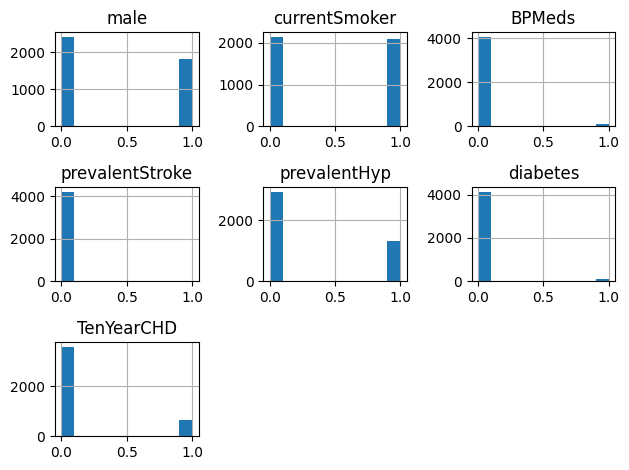

In [292]:
#checking data distribution of features which has only binary values
binary_df=df[['male', 'currentSmoker','BPMeds','prevalentStroke', 'prevalentHyp','diabetes', 'TenYearCHD']]
binary_df.hist()
plt.tight_layout()

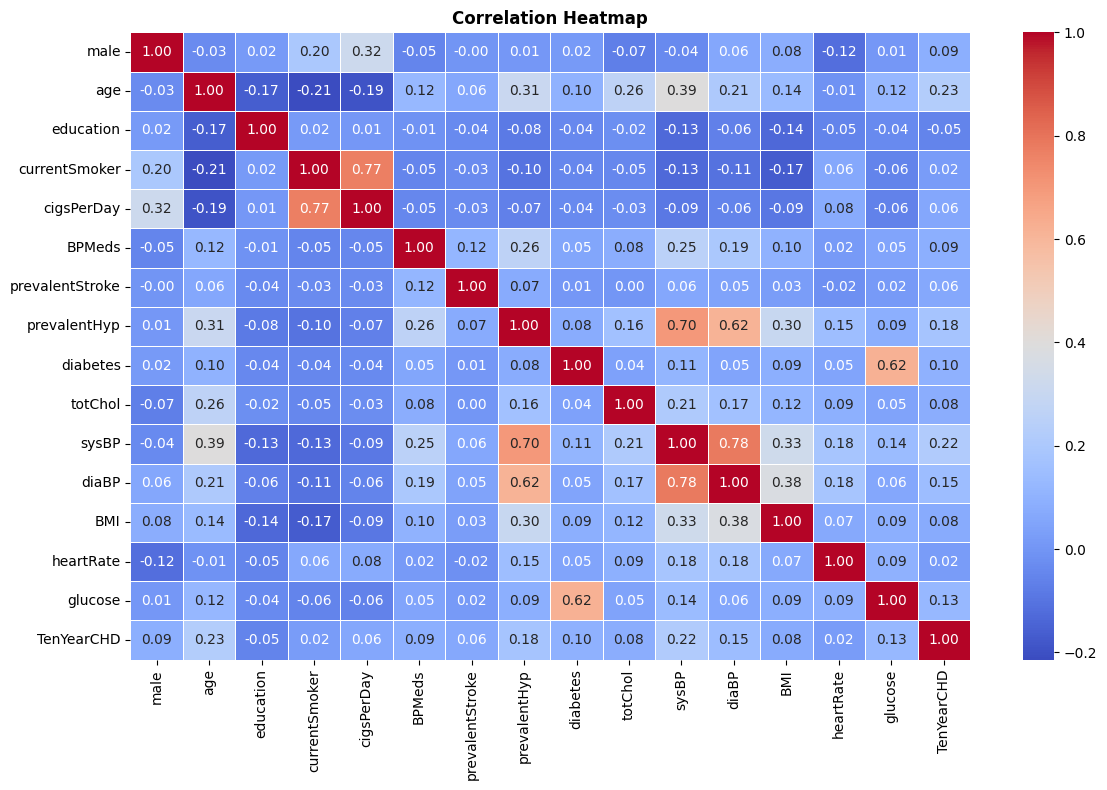

In [293]:

# 1. Compute the correlation matrix
corr_df=df.corr()

# 2. Set up the figure size
plt.figure(figsize=(12, 8))

# 3. Create the heatmap
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# 4. Title
plt.title('Correlation Heatmap', fontweight='bold')
plt.tight_layout()

In [295]:
df.isnull().sum().sort_values(ascending=False)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
prevalentHyp         0
prevalentStroke      0
age                  0
currentSmoker        0
diaBP                0
sysBP                0
diabetes             0
TenYearCHD           0
dtype: int64

In [296]:
#filling missing values by medians

df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['glucose'] = df['glucose'].fillna(df['glucose'].median())
df['education'] = df['education'].fillna(df['education'].median())
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

df.isnull().sum() # for checking filled values

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [297]:
#assigning x and y
x=df.iloc[:, :-1]
y=df['TenYearCHD']


In [298]:
#splitting the data into training and testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=32)


In [299]:
#scaling the data
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [300]:
#making logistic regression model
log_reg=LogisticRegression()

#training the model

log_reg.fit(x_train,y_train)
log_pred=log_reg.predict(x_test)
#making data frame
#pred=pd.DataFrame({'Actual_value': y_test, 'predicted value':log_pred})


print(f'acuracy score: {metrics.accuracy_score(y_test,log_pred)}')
confusion_matrix(y_test,log_pred)

acuracy score: 0.8620283018867925


array([[717,   4],
       [113,  14]])

In [301]:
#finding coefficient to know which features have stronger power to predict the traget output
coefficients = log_reg.coef_[0]
intercept = log_reg.intercept_[0]
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

print(f"Intercept (β0): {intercept}")

male: 0.26725747475663897
age: 0.5266104204987051
education: -0.03583085399252075
currentSmoker: 0.03102005281442629
cigsPerDay: 0.21714305724845917
BPMeds: 0.06368830497342524
prevalentStroke: 0.054798797121829106
prevalentHyp: 0.11548314699691907
diabetes: 0.05183142746006908
totChol: 0.052554332883179004
sysBP: 0.3147990590250001
diaBP: -0.04374906407494264
BMI: -0.03616910617070049
heartRate: -0.0005817351736518348
glucose: 0.12640595884133335
Intercept (β0): -1.9636768270565053


In [302]:
# logistic regression with Kfold validation
x1=df.iloc[:, :-1]
y1=df['TenYearCHD']

scaler=StandardScaler()
x1=scaler.fit_transform(x1)


model = LogisticRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=32)
scores = cross_val_score(model, x1, y1, cv=kf)
print("K-Fold Cross Validation scores:", scores)
print("Mean accuracy:", np.mean(scores))


K-Fold Cross Validation scores: [0.8620283  0.83726415 0.85731132 0.85832349 0.85478158]
Mean accuracy: 0.8539417700652692


In [303]:
#building logistic regression model model by over sampling 

df1 = pd.read_csv('heart_data.csv')

#filling missimg values with median
df1['cigsPerDay'] = df1['cigsPerDay'].fillna(df1['cigsPerDay'].median())
df1['totChol'] = df1['totChol'].fillna(df1['totChol'].median())
df1['BMI'] = df1['BMI'].fillna(df1['BMI'].median())
df1['glucose'] = df1['glucose'].fillna(df1['glucose'].median())
df1['education'] = df1['education'].fillna(df1['education'].median())
df1['BPMeds'] = df1['BPMeds'].fillna(df1['BPMeds'].median())
df1['heartRate'] = df1['heartRate'].fillna(df1['heartRate'].median())


majority = df1[df1['TenYearCHD'] == 0]
minority = df1[df1['TenYearCHD'] == 1]


## undersample the majority to match the minority 
minority_oversampled = minority.sample(n=len(majority), replace=True, random_state= 32)

## udate the dataframe to reflect the minority
df1 = pd.concat([majority, minority_oversampled], ignore_index=True).sample(frac=1, random_state= 32).reset_index(drop=True)
#df1['TenYearCHD'].value_counts()
#df1
                                       

X=df1.iloc[:, :-1]
Y=df1['TenYearCHD']


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=32)

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


log_reg1=LogisticRegression()

#training the model

log_reg1.fit(X_train,Y_train)
log_pred1=log_reg1.predict(X_test)
#making data frame
pred=pd.DataFrame({'Actual_value': Y_test, 'predicted value':log_pred1})
#pred

print(f'acuracy score: {metrics.accuracy_score(Y_test,log_pred1)}')
confusion_matrix(Y_test,log_pred1)


acuracy score: 0.6759388038942976


array([[476, 233],
       [233, 496]])

In [304]:
#building logistic regression model by under sampling 

df2 = pd.read_csv('heart_data.csv')


#filling missimg values with median
df2['cigsPerDay'] = df2['cigsPerDay'].fillna(df2['cigsPerDay'].median())
df2['totChol'] = df2['totChol'].fillna(df2['totChol'].median())
df2['BMI'] = df2['BMI'].fillna(df2['BMI'].median())
df2['glucose'] = df2['glucose'].fillna(df2['glucose'].median())
df2['education'] = df2['education'].fillna(df2['education'].median())
df2['BPMeds'] = df2['BPMeds'].fillna(df2['BPMeds'].median())
df2['heartRate'] = df2['heartRate'].fillna(df2['heartRate'].median())

majority = df2[df2['TenYearCHD'] == 0]
minority = df2[df2['TenYearCHD'] == 1]


## undersample the majority to match the minority 
major_undersampled = majority.sample(n=len(minority), random_state= 32)

## udate the dataframe to reflect the minority
df2 = pd.concat([major_undersampled, minority], ignore_index=True).sample(frac=1, random_state= 32).reset_index(drop=True)
df2['TenYearCHD'].value_counts()

                                       

X=df2.iloc[:, :-1]
Y=df2['TenYearCHD']


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=32)

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


log_reg1=LogisticRegression()

#training the model

log_reg1.fit(X_train,Y_train)
log_pred1=log_reg1.predict(X_test)
#making data frame
pred=pd.DataFrame({'Actual_value': Y_test, 'predicted value':log_pred1})
#pred

print(f'acuracy score: {metrics.accuracy_score(Y_test,log_pred1)}')
confusion_matrix(Y_test,log_pred1)


acuracy score: 0.7054263565891473


array([[92, 32],
       [44, 90]])

In [305]:
df2.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

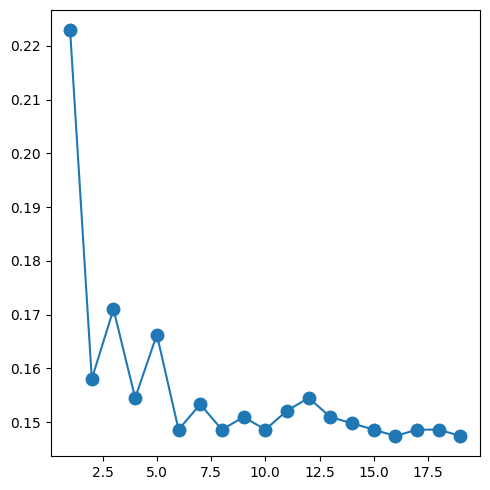

In [306]:
#Building KNN model 
df3 = pd.read_csv('heart_data.csv')

df3['cigsPerDay'] = df3['cigsPerDay'].fillna(df3['cigsPerDay'].median())
df3['totChol'] = df3['totChol'].fillna(df3['totChol'].median())
df3['BMI'] = df3['BMI'].fillna(df3['BMI'].median())
df3['glucose'] = df3['glucose'].fillna(df3['glucose'].median())
df3['education'] = df3['education'].fillna(df3['education'].median())
df3['BPMeds'] = df3['BPMeds'].fillna(df3['BPMeds'].median())
df3['heartRate'] = df3['heartRate'].fillna(df3['heartRate'].median())

#Tried faetured clif to remove the outliers but it didn't improve the the accuracy a lot (.001) 
# df3['sysBP'] = np.clip(df3['sysBP'], 82, 190 )
# df3['diaBP'] = np.clip(df3['diaBP'], 50, 110 )
# df3['glucose'] = np.clip(df3['glucose'], 40, 150 )
# df3['totChol']= np.clip(df3['totChol'], 107, 400 )
# df3['BMI']= np.clip(df3['BMI'], 15, 45 )
# df3['cigsPerDay']=np.clip(df3['BMI'], 11, 45 )

X=df3.iloc[:, :-1]
Y=df3['TenYearCHD']

#Trying to reduce features for KNN 
#X=df3[['male','age','cigsPerDay','BPMeds','prevalentStroke', 'prevalentHyp','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']]
# Accuracy result didn't improve much



X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=32)

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

error_rate=[]

for i in range(1,20):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred= knn.predict(X_test)
    error_rate.append(np.mean(pred != Y_test))
plt.figure(figsize=(5,5))
plt.plot(range(1,20), error_rate, marker ='o', markersize=9)
plt.tight_layout()


In [198]:
knn_model=KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train,Y_train)

,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [208]:
Y_pred_knn= knn_model.predict(X_test)
metrics.accuracy_score(Y_test,Y_pred_knn)
print(f'acuracy score: {metrics.accuracy_score(Y_test,Y_pred_knn)}')
confusion_matrix(Y_test,Y_pred_knn)


acuracy score: 0.8514150943396226


array([[714,   7],
       [119,   8]])